## Introduction


In [33]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [34]:
iris = load_iris()

iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [35]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [36]:
x = iris.data[:, 2:]
y = iris['target']

In [37]:
tree_clf = DecisionTreeClassifier()

tree_clf.fit(x, y)

DecisionTreeClassifier()

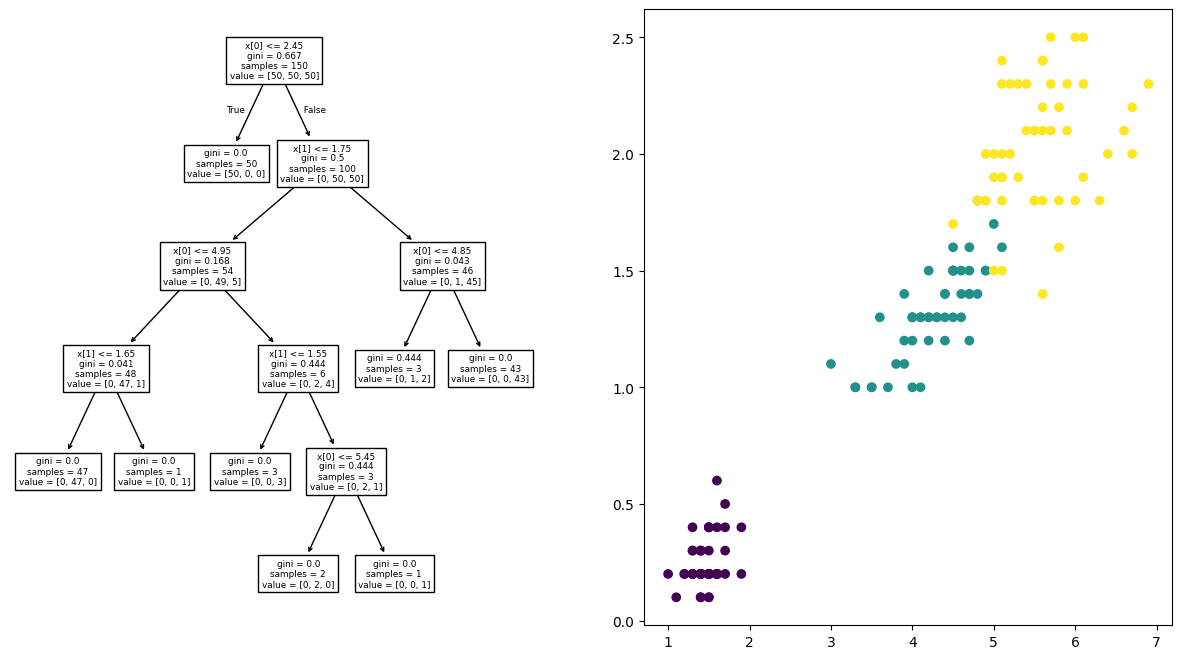

In [38]:
fig, ax = plt.subplots(1, 2, figsize=(15, 8))
tree.plot_tree(tree_clf, ax = ax[0])
ax[1].scatter(x[:, 0], x[:, 1], c=y)

## Decision trees problem - overfitting

In [39]:
from sklearn.datasets import make_blobs

In [40]:
x, y = make_blobs(n_samples= 100, n_features= 2, centers= 2, cluster_std=3  , random_state=0)

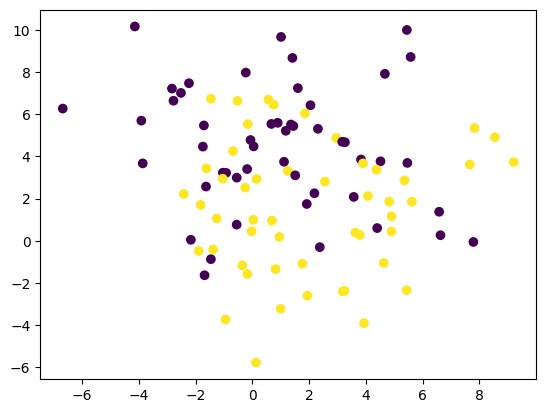

In [41]:
plt.scatter(x[:, 0], x[:,1], c=y)

[Text(0.64375, 0.9615384615384616, 'x[1] <= 3.665\ngini = 0.5\nsamples = 100\nvalue = [50, 50]'),
 Text(0.42083333333333334, 0.8846153846153846, 'x[1] <= -0.965\ngini = 0.432\nsamples = 57\nvalue = [18, 39]'),
 Text(0.5322916666666667, 0.9230769230769231, 'True  '),
 Text(0.31666666666666665, 0.8076923076923077, 'x[0] <= -1.316\ngini = 0.133\nsamples = 14\nvalue = [1, 13]'),
 Text(0.2833333333333333, 0.7307692307692307, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.35, 0.7307692307692307, 'gini = 0.0\nsamples = 13\nvalue = [0, 13]'),
 Text(0.525, 0.8076923076923077, 'x[0] <= 6.099\ngini = 0.478\nsamples = 43\nvalue = [17, 26]'),
 Text(0.4166666666666667, 0.7307692307692307, 'x[0] <= 3.597\ngini = 0.46\nsamples = 39\nvalue = [14.0, 25.0]'),
 Text(0.3, 0.6538461538461539, 'x[0] <= 1.38\ngini = 0.497\nsamples = 28\nvalue = [13, 15]'),
 Text(0.23333333333333334, 0.5769230769230769, 'x[0] <= -0.107\ngini = 0.463\nsamples = 22\nvalue = [8, 14]'),
 Text(0.2, 0.5, 'x[0] <= -1.044\ngini =

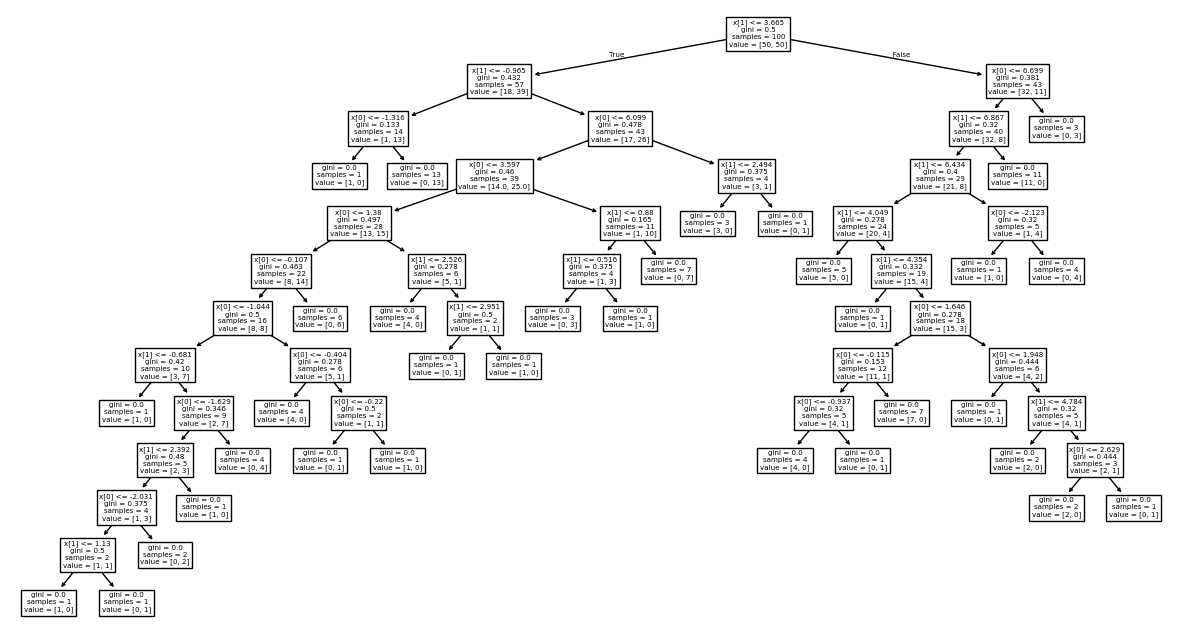

In [42]:
tree_clf = DecisionTreeClassifier(max_depth=50)
tree_clf.fit(x, y)

fig, ax = plt.subplots(figsize=(15, 8))
tree.plot_tree(tree_clf)

C:\Users\Notebook\AppData\Local\Temp\ipykernel_28288\3291922330.py:14: UserWarning: The following kwargs were not used by contour: 'allpha'
  ax.contourf(xx, yy, Z, allpha=0.4)


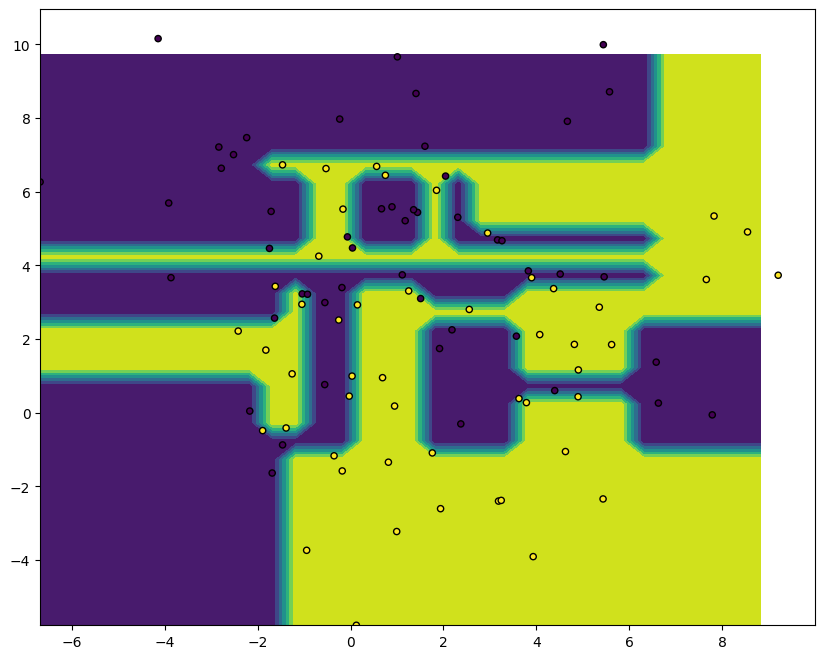

In [43]:
x0_min, x0_max = x[:, 0].min(), x[:, 0].max()
x1_min, x1_max = x[:, 1].min(), x[:, 1].max()

xx, yy = np.meshgrid(
    np.arange(x0_min, x0_max, 0.5), 
    np.arange(x1_min, x1_max, 0.5),
)

fig, ax = plt.subplots(sharex="col", sharey="row", figsize=(10, 8))

Z = tree_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

ax.contourf(xx, yy, Z, allpha=0.4)
ax.scatter(x[:, 0], x[:, 1], c=y, s=20, edgecolors="k")
plt.show()

## Regression models


In [44]:
from sklearn.tree import DecisionTreeRegressor

rng = np.random.RandomState(1)
x = np.sort(5* rng.rand(80, 1), axis=0)
y = np.sin(x).ravel()

y[::5] += 3 * (0.5 -np.random.rand(16))


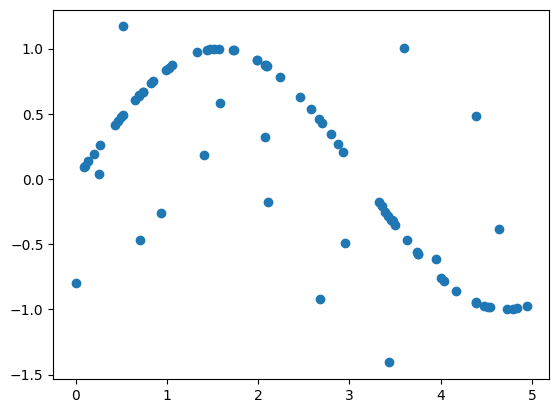

In [45]:
plt.scatter(x, y)

In [46]:
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(x, y)
regr_2.fit(x, y)

DecisionTreeRegressor(max_depth=5)

[Text(0.5, 0.8333333333333334, 'x[0] <= 2.94\nsquared_error = 0.487\nsamples = 80\nvalue = 0.105'),
 Text(0.25, 0.5, 'x[0] <= 0.346\nsquared_error = 0.211\nsamples = 50\nvalue = 0.509'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'squared_error = 0.112\nsamples = 7\nvalue = 0.003'),
 Text(0.375, 0.16666666666666666, 'squared_error = 0.179\nsamples = 43\nvalue = 0.591'),
 Text(0.75, 0.5, 'x[0] <= 4.391\nsquared_error = 0.224\nsamples = 30\nvalue = -0.567'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'squared_error = 0.231\nsamples = 21\nvalue = -0.417'),
 Text(0.875, 0.16666666666666666, 'squared_error = 0.035\nsamples = 9\nvalue = -0.915')]

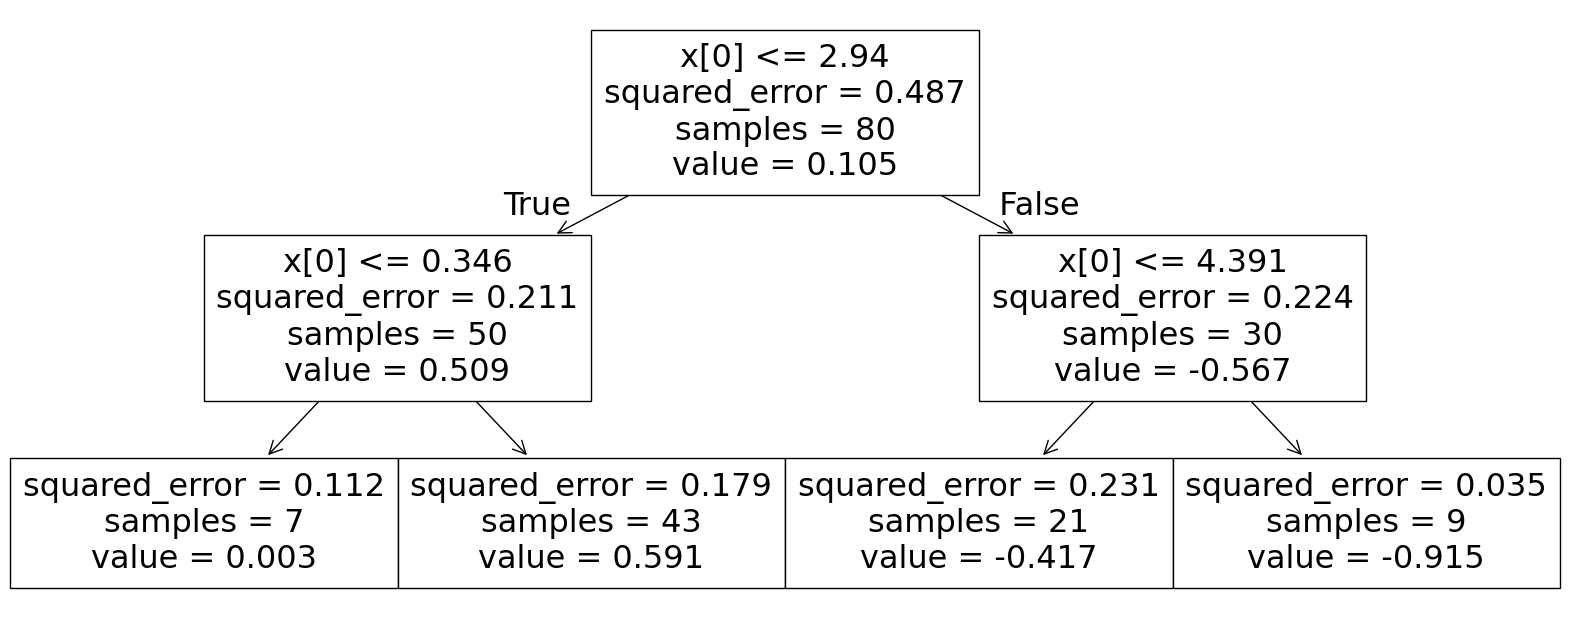

In [47]:
fig, ax = plt.subplots(figsize=(20, 8))
tree.plot_tree(regr_1)

[Text(0.4734848484848485, 0.9166666666666666, 'x[0] <= 2.94\nsquared_error = 0.487\nsamples = 80\nvalue = 0.105'),
 Text(0.1893939393939394, 0.75, 'x[0] <= 0.346\nsquared_error = 0.211\nsamples = 50\nvalue = 0.509'),
 Text(0.3314393939393939, 0.8333333333333333, 'True  '),
 Text(0.06060606060606061, 0.5833333333333334, 'x[0] <= 0.046\nsquared_error = 0.112\nsamples = 7\nvalue = 0.003'),
 Text(0.030303030303030304, 0.4166666666666667, 'squared_error = 0.0\nsamples = 1\nvalue = -0.8'),
 Text(0.09090909090909091, 0.4166666666666667, 'x[0] <= 0.258\nsquared_error = 0.006\nsamples = 6\nvalue = 0.137'),
 Text(0.06060606060606061, 0.25, 'x[0] <= 0.223\nsquared_error = 0.003\nsamples = 5\nvalue = 0.111'),
 Text(0.030303030303030304, 0.08333333333333333, 'squared_error = 0.002\nsamples = 4\nvalue = 0.13'),
 Text(0.09090909090909091, 0.08333333333333333, 'squared_error = -0.0\nsamples = 1\nvalue = 0.037'),
 Text(0.12121212121212122, 0.25, 'squared_error = 0.0\nsamples = 1\nvalue = 0.264'),
 Text

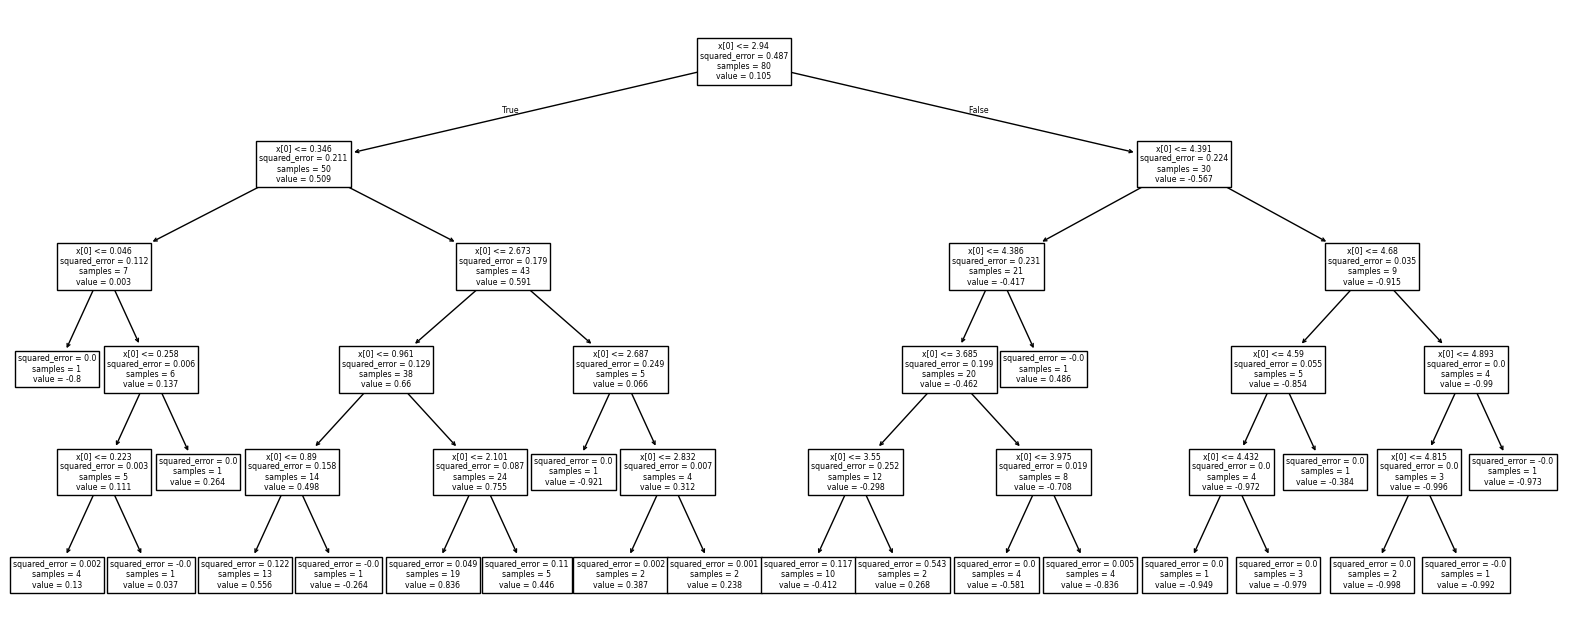

In [48]:
fig, ax = plt.subplots(figsize=(20, 8))
tree.plot_tree(regr_2)

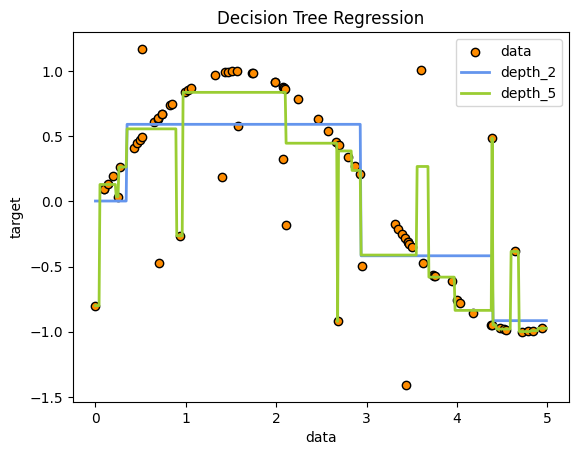

In [52]:
x_test = np.arange(0, 5, 0.01)[: ,np.newaxis]

y_1 = regr_1.predict(x_test)
y_2 = regr_2.predict(x_test)


plt.figure()
plt.scatter(x, y, edgecolors="black", c="darkorange", label= "data")
plt.plot(x_test, y_1, color="cornflowerblue", label= "depth_2", linewidth=2)
plt.plot(x_test, y_2, color="yellowgreen", label= "depth_5", linewidth=2)

plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()